In [3]:
#run this script to install all the required packages
#!pip install -r requirements.txt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import mysql.connector

## Daten aus Datenbank laden

In [5]:
#creating variables for the database connection
benutzer = "production1"
passwort = "production42!"
server = "195.20.227.20"
db = "production1"
port = 32771
datenbank = mysql.connector.connect(
    host = server,
    user = benutzer,
    password = passwort,
    database = db,
    port = port,
    auth_plugin = 'mysql_native_password',
    connect_timeout=100000
)


In [6]:
data = pd.read_sql_query("SELECT * FROM wartung", datenbank)

C:\Users\fzent\AppData\Local\Temp\ipykernel_22616\4161318350.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("SELECT * FROM wartung", datenbank)


## Daten aufbereiten

In [7]:
#Datentypen ausgeben
print("Datentypen:")
print(data.info())

Datentypen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1095 non-null   int64  
 1   MaschinenID       1095 non-null   object 
 2   Datum             1095 non-null   object 
 3   Zeit              1095 non-null   object 
 4   Druck             1095 non-null   float64
 5   Temperatur        1095 non-null   float64
 6   Vibration         1095 non-null   float64
 7   Anzahlwarning     1095 non-null   int64  
 8   Ausschuss         1095 non-null   float64
 9   Produktionsindex  1095 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 85.7+ KB
None


In [8]:
#Anzahl missing data
print("Datentypen:")
print(data.isnull().sum())

Datentypen:
MesswertID          0
MaschinenID         0
Datum               0
Zeit                0
Druck               0
Temperatur          0
Vibration           0
Anzahlwarning       0
Ausschuss           0
Produktionsindex    0
dtype: int64


In [9]:
#Datensätze mit Duplikaten entfernen
data.drop_duplicates(inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1095 non-null   int64  
 1   MaschinenID       1095 non-null   object 
 2   Datum             1095 non-null   object 
 3   Zeit              1095 non-null   object 
 4   Druck             1095 non-null   float64
 5   Temperatur        1095 non-null   float64
 6   Vibration         1095 non-null   float64
 7   Anzahlwarning     1095 non-null   int64  
 8   Ausschuss         1095 non-null   float64
 9   Produktionsindex  1095 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 85.7+ KB
None


In [10]:
print(data.head())

   MesswertID MaschinenID       Datum   Zeit    Druck  Temperatur  Vibration  \
0       12478          A1  01.02.2022  06:00  47.6190     61.9048    28.5714   
1       12479          A1  01.02.2022  06:05  48.5714     62.8571    47.6190   
2       12480          A1  01.02.2022  06:10  57.1429     76.1905    33.3333   
3       12481          A1  01.02.2022  06:15   0.0000      0.0000     0.0000   
4       12482          A1  01.02.2022  06:20   0.0000      0.0000     0.0000   

   Anzahlwarning  Ausschuss  Produktionsindex  
0              3        2.0                85  
1              5        3.0                87  
2             12       11.0                91  
3              2        0.0                84  
4              2        0.0                85  


### Fehlerhafte Daten  beim Datum identifizieren und korrigieren

In [11]:
# Convert date column to datetime format if value is not usable as date format remove them
data['Datum'] = pd.to_datetime(data['Datum'], format='%d.%m.%Y', errors='coerce').dt.date
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1095 non-null   int64  
 1   MaschinenID       1095 non-null   object 
 2   Datum             1086 non-null   object 
 3   Zeit              1095 non-null   object 
 4   Druck             1095 non-null   float64
 5   Temperatur        1095 non-null   float64
 6   Vibration         1095 non-null   float64
 7   Anzahlwarning     1095 non-null   int64  
 8   Ausschuss         1095 non-null   float64
 9   Produktionsindex  1095 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 85.7+ KB
None


In [12]:
print(data.head())

   MesswertID MaschinenID       Datum   Zeit    Druck  Temperatur  Vibration  \
0       12478          A1  2022-02-01  06:00  47.6190     61.9048    28.5714   
1       12479          A1  2022-02-01  06:05  48.5714     62.8571    47.6190   
2       12480          A1  2022-02-01  06:10  57.1429     76.1905    33.3333   
3       12481          A1  2022-02-01  06:15   0.0000      0.0000     0.0000   
4       12482          A1  2022-02-01  06:20   0.0000      0.0000     0.0000   

   Anzahlwarning  Ausschuss  Produktionsindex  
0              3        2.0                85  
1              5        3.0                87  
2             12       11.0                91  
3              2        0.0                84  
4              2        0.0                85  


In [13]:
# Convert Zeit column to time format if value is not usable as time format remove them
data['Zeit'] = pd.to_datetime(data['Zeit'], format='%H:%M', errors='coerce').dt.time
d1 = data

### Neue Ausfall Spalte hinzufügen

In [14]:
# Add new Column 'Ausfall' with 0 or 1 for each row. Ausfall = 1 means Column Druck, Temperatur, Vibration and Ausschuss are all 0
d1['Ausfall'] = np.where((d1['Druck'] == 0) & (d1['Temperatur'] == 0) & (d1['Vibration'] == 0) & (d1['Ausschuss'] == 0), 1, 0)
print(d1.head(10))
d2 = d1

   MesswertID MaschinenID       Datum      Zeit    Druck  Temperatur  \
0       12478          A1  2022-02-01  06:00:00  47.6190     61.9048   
1       12479          A1  2022-02-01  06:05:00  48.5714     62.8571   
2       12480          A1  2022-02-01  06:10:00  57.1429     76.1905   
3       12481          A1  2022-02-01  06:15:00   0.0000      0.0000   
4       12482          A1  2022-02-01  06:20:00   0.0000      0.0000   
5       12483          A1  2022-02-01  06:25:00   0.0000      0.0000   
6       12484          A1  2022-02-01  06:30:00   0.0000      0.0000   
7       12485          A1  2022-02-01  06:35:00   0.0000      0.0000   
8       12486          A1  2022-02-01  06:40:00   0.0000      0.0000   
9       12487          A1  2022-02-01  06:45:00   0.0000      0.0000   

   Vibration  Anzahlwarning  Ausschuss  Produktionsindex  Ausfall  
0    28.5714              3        2.0                85        0  
1    47.6190              5        3.0                87        0  
2  

In [15]:
print(d2['Ausfall'].value_counts())

Ausfall
0    807
1    288
Name: count, dtype: int64


In [16]:
# if one of druck, vibration or temperatur is 0 and Ausfall = 0 then new column 'Error' = 1
d2['Error'] = np.where((d2['Ausfall'] == 0) & ((d2['Druck'] == 0) | (d2['Temperatur'] == 0) | (d2['Vibration'] == 0)), 1, 0)

In [17]:
#count the number of errors
print(d2['Error'].value_counts())

Error
0    1065
1      30
Name: count, dtype: int64


In [18]:
#30 errors können gelöscht werden, da unter 1% der Daten
d2 = d2[d2['Error'] == 0]
d2 = d2.drop(['Error'], axis=1)
print(d2.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1065 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1065 non-null   int64  
 1   MaschinenID       1065 non-null   object 
 2   Datum             1056 non-null   object 
 3   Zeit              1056 non-null   object 
 4   Druck             1065 non-null   float64
 5   Temperatur        1065 non-null   float64
 6   Vibration         1065 non-null   float64
 7   Anzahlwarning     1065 non-null   int64  
 8   Ausschuss         1065 non-null   float64
 9   Produktionsindex  1065 non-null   int64  
 10  Ausfall           1065 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 95.7+ KB
None


In [19]:
#In der Datumsspalte gibt es leere Werte da diese nicht in einem gültigen Format sind. Diese Zeilen können gelöscht werden, da sie nur 0,1% der Daten ausmachen (alternativ könnte man die Annahme treffen, dass diese, da am ende dem 08.02. zugeordnet werden können (input))
d2 = d2.dropna(subset=['Datum'])
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1056 non-null   int64  
 1   MaschinenID       1056 non-null   object 
 2   Datum             1056 non-null   object 
 3   Zeit              1056 non-null   object 
 4   Druck             1056 non-null   float64
 5   Temperatur        1056 non-null   float64
 6   Vibration         1056 non-null   float64
 7   Anzahlwarning     1056 non-null   int64  
 8   Ausschuss         1056 non-null   float64
 9   Produktionsindex  1056 non-null   int64  
 10  Ausfall           1056 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 94.9+ KB
None


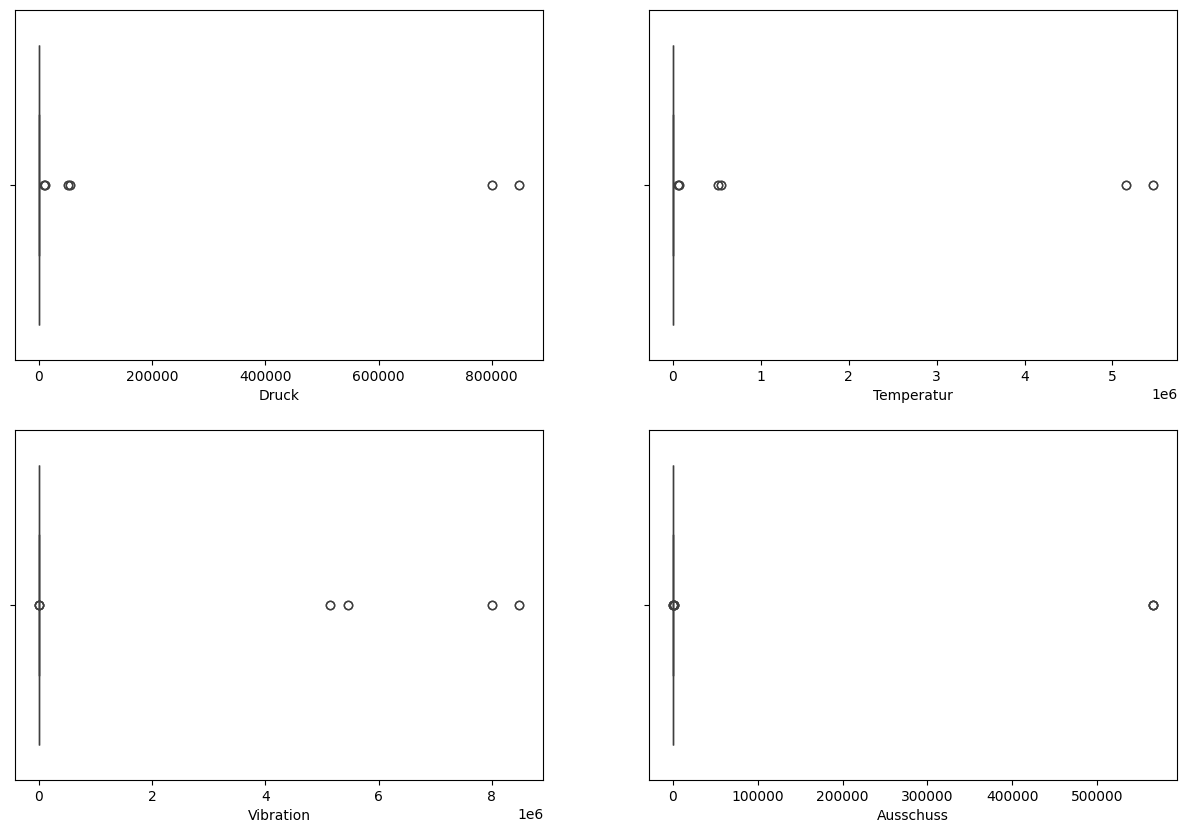

In [20]:
#Ausreiser erkennen für Druck, Temperatur, Vibration und Ausschuss in einem boxplot mit seaborn
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(x=d2['Druck'], ax=ax[0,0])
sns.boxplot(x=d2['Temperatur'], ax=ax[0,1])
sns.boxplot(x=d2['Vibration'], ax=ax[1,0])
sns.boxplot(x=d2['Ausschuss'], ax=ax[1,1])
plt.show()

In [21]:
#ausreißer entfernen druck über 100 aber leere behalten
d2 = d2[(d2['Druck'] < 100) | (d2['Druck'].isnull())]
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1044 non-null   int64  
 1   MaschinenID       1044 non-null   object 
 2   Datum             1044 non-null   object 
 3   Zeit              1044 non-null   object 
 4   Druck             1044 non-null   float64
 5   Temperatur        1044 non-null   float64
 6   Vibration         1044 non-null   float64
 7   Anzahlwarning     1044 non-null   int64  
 8   Ausschuss         1044 non-null   float64
 9   Produktionsindex  1044 non-null   int64  
 10  Ausfall           1044 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 93.8+ KB


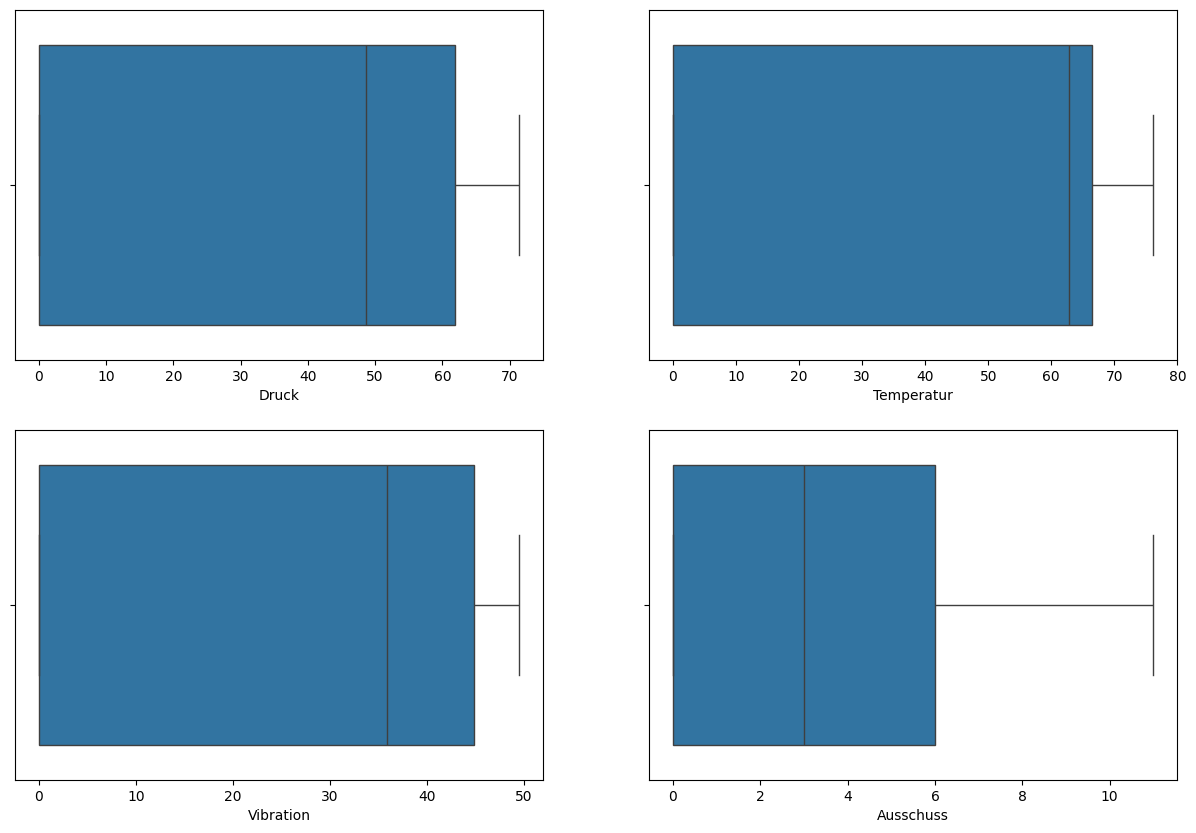

In [22]:
#Ausreißer überprüfen
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(x=d2['Druck'], ax=ax[0,0])
sns.boxplot(x=d2['Temperatur'], ax=ax[0,1])
sns.boxplot(x=d2['Vibration'], ax=ax[1,0])
sns.boxplot(x=d2['Ausschuss'], ax=ax[1,1])
plt.show()

### Daten die NaN sind durch 0 ersetzen und in d3 speichern

In [23]:
d3 = d2

In [24]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesswertID        1044 non-null   int64  
 1   MaschinenID       1044 non-null   object 
 2   Datum             1044 non-null   object 
 3   Zeit              1044 non-null   object 
 4   Druck             1044 non-null   float64
 5   Temperatur        1044 non-null   float64
 6   Vibration         1044 non-null   float64
 7   Anzahlwarning     1044 non-null   int64  
 8   Ausschuss         1044 non-null   float64
 9   Produktionsindex  1044 non-null   int64  
 10  Ausfall           1044 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 93.8+ KB


In [25]:
d4 = d3

In [26]:
#irrelevante spalten entfernen
d4 = d4.drop(['Datum', 'Zeit', 'Produktionsindex','MaschinenID','MesswertID'], axis=1)

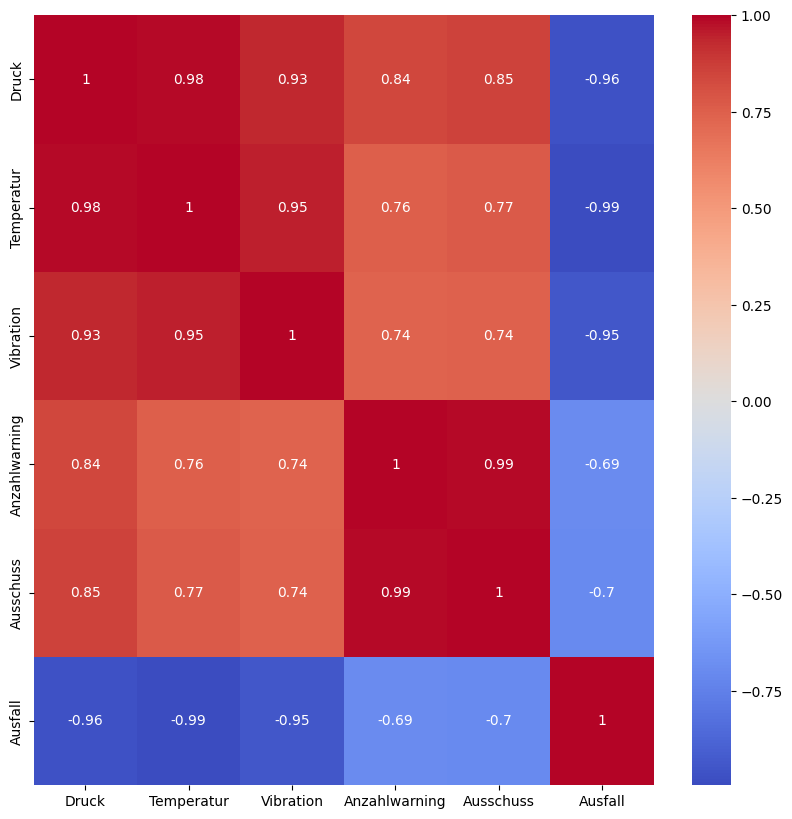

In [27]:
#korrelationen anzeigen
correlation = d4.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

#### Rollender Mittelwert:

In [28]:
#rollender mittelwert hinzufügen
d4['Druck_rolling'] = d3['Druck'].rolling(window=12).mean()
d4['Vibration_rolling'] = d3['Vibration'].rolling(window=12).mean()
d4['Temperatur_rolling'] = d3['Temperatur'].rolling(window=12).mean()
d4['Ausschuss_rolling'] = d3['Ausschuss'].rolling(window=12).mean()
d4['Anzahlwarning_rolling'] = d3['Anzahlwarning'].rolling(window=12).mean()

In [29]:
#rollende standardabweichung hinzufügen
d4['Druck_std'] = d3['Druck'].rolling(window=12).std()
d4['Vibration_std'] = d3['Vibration'].rolling(window=12).std()
d4['Temperatur_std'] = d3['Temperatur'].rolling(window=12).std()
d4['Anzahlwarning_std'] = d3['Anzahlwarning'].rolling(window=12).std()

In [30]:
#andere spalten entfernen
d4 = d4.drop(['Druck', 'Vibration', 'Temperatur', 'Ausschuss',"Anzahlwarning"], axis=1)
d4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1085
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ausfall                1044 non-null   int32  
 1   Druck_rolling          1033 non-null   float64
 2   Vibration_rolling      1033 non-null   float64
 3   Temperatur_rolling     1033 non-null   float64
 4   Ausschuss_rolling      1033 non-null   float64
 5   Anzahlwarning_rolling  1033 non-null   float64
 6   Druck_std              1033 non-null   float64
 7   Vibration_std          1033 non-null   float64
 8   Temperatur_std         1033 non-null   float64
 9   Anzahlwarning_std      1033 non-null   float64
dtypes: float64(9), int32(1)
memory usage: 85.6 KB


In [31]:
#fill NaN values with 0
d4 = d4.fillna(0)

In [32]:
d4.describe()

,Ausfall,Druck_rolling,Vibration_rolling,Temperatur_rolling,Ausschuss_rolling,Anzahlwarning_rolling,Druck_std,Vibration_std,Temperatur_std,Anzahlwarning_std
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.275862,39.727940,28.540847,46.536921,3.530252,5.019636,15.341296,13.401656,16.744209,2.256219
std,0.447162,16.928659,12.181203,19.882491,1.870546,1.901900,13.560029,7.097356,15.321920,1.414042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.930546,19.047600,30.198410,2.500000,3.916667,0.497375,9.808155,0.497322,0.792961
50%,0.000000,45.489863,31.984100,52.460313,2.916667,4.416667,18.730672,12.839514,19.931473,2.282165
75%,1.000000,48.174567,39.285675,62.460308,4.916667,6.416667,29.170720,20.312569,32.193656,3.528026
max,1.000000,65.547608,43.619042,70.079358,8.166667,9.583333,36.017949,24.136274,37.374398,5.262791


In [33]:
df_reset = d4.reset_index(drop=True)


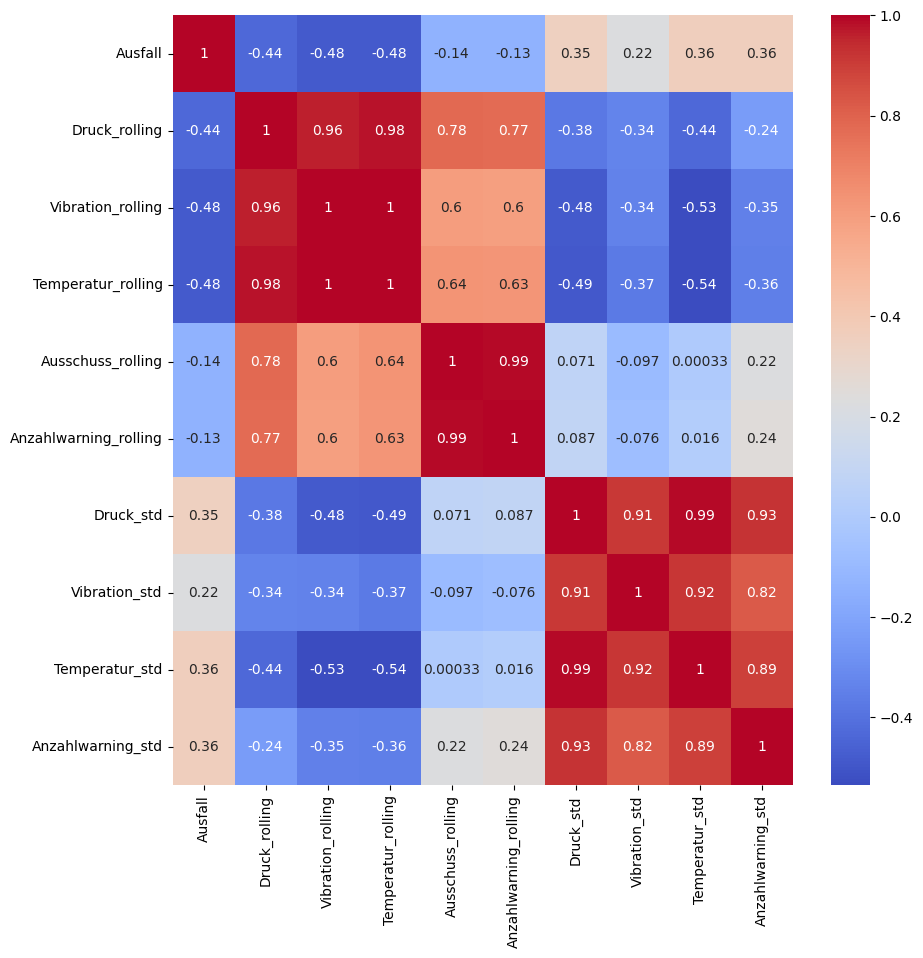

In [34]:
#korre
correlation = df_reset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Man erkennt, dass die Vibration und Temperatur am meisten Einfluss haben

In [35]:
X = d4.drop('Ausfall', axis=1) 
y = d4['Ausfall']  

In [36]:
#train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Testen der Unterschiedlichen Modelle

In [37]:
#trainieren des Logistischen Regressionsmodells
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#Ergebnisse ausgeben
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       148
           1       0.74      0.57      0.65        61

    accuracy                           0.82       209
   macro avg       0.79      0.75      0.76       209
weighted avg       0.81      0.82      0.81       209



c:\Users\fzent\Documents\1_Software\Big Data\big-data-management\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#trainieren des Random Forest Modells
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
#Ergebnisse ausgeben
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       148
           1       0.96      0.79      0.86        61

    accuracy                           0.93       209
   macro avg       0.94      0.89      0.91       209
weighted avg       0.93      0.93      0.93       209



In [39]:
#trainieren des Gradient Boosting Modells
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
#Ergebnisse ausgeben
gb_predictions = gb.predict(X_test)
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       148
           1       0.93      0.84      0.88        61

    accuracy                           0.93       209
   macro avg       0.93      0.90      0.92       209
weighted avg       0.93      0.93      0.93       209



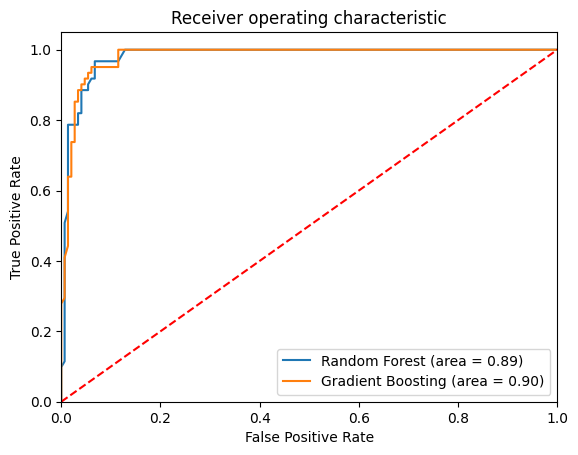

In [40]:
#Vergleichen der 2 besten Modelle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Entscheidung für das Gradient Boosting Model

In [41]:
#Wahrschienlichkeit für Ausfall berechnen
y_pred = gb.predict_proba(X_test)[:,1]

In [42]:
y_pred = pd.DataFrame(y_pred, columns=['Probability'])
y_pred['Actual'] = y_test.values
y_pred['Predicted'] = predictions
y_pred['Error'] = np.where(y_pred['Actual'] == y_pred['Predicted'], 0, 1)
y_pred['Error'].value_counts()

Error
0    171
1     38
Name: count, dtype: int64

In [43]:
y_pred

,Probability,Actual,Predicted,Error
0,0.006976,0,0,0
1,0.643976,0,0,0
2,0.015336,0,0,0
3,0.023409,0,0,0
4,0.020602,0,0,0
...,...,...,...,...
204,0.008145,0,0,0
205,0.396372,0,0,0
206,0.017429,0,0,0
207,0.006976,0,0,0


In [59]:
#testen wie die verteilung der zielvariable ist und in % anzeigen
d4['Ausfall'].value_counts(normalize=True) * 100

Ausfall
0    72.413793
1    27.586207
Name: proportion, dtype: float64

Eine Verteilung von 50/50 ist bestrebenswerte, jedoch wird diese nicht erreicht wodurch eine Methode zum Normalisieren angewendet werden müsste

In [61]:
#testen wie das Modell performt wenn die Zielvariable normalisiert wird
from sklearn.utils import resample
#Separieren der Zielvariablen
df_majority = d4[d4.Ausfall==0]
df_minority = d4[d4.Ausfall==1]
#Upsamlpling der Minderheit
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=700,    
                                 random_state=42) 
#Kombinieren der Mehrheit und der upgesamplten Minderheit
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#Anzeigen der neuen Verteilung
df_upsampled.Ausfall.value_counts()


Ausfall
0    756
1    700
Name: count, dtype: int64

In [65]:
X_up = df_upsampled.drop('Ausfall', axis=1)
y_up = df_upsampled['Ausfall']
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2, random_state=42)

In [66]:
#trainieren des Gradient Boosting Modells
from sklearn.ensemble import GradientBoostingClassifier
gb_up = GradientBoostingClassifier()
gb_up.fit(X_train_up, y_train_up)
#Ergebnisse ausgeben
gb_predictions_up = gb.predict(X_test_up)
print(classification_report(y_test_up,gb_predictions_up))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       154
           1       0.97      0.98      0.97       138

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292



Man erkennt, dass bei einer normalisierten Zielvariable eine noch genauere prediction erzielt werden kann.

In [56]:
#Modell speichern
import pickle
filename = 'finalized_model.pkl'
pickle.dump(gb, open(filename, 'wb'))

## Datenanalyse

Datenanalyse mit Klassifikationsmodell auf die Zielvariable Ausfall

Import benötigter Pakete:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

Aufteilung der Daten in Trainings- und Testdaten von d2:


In [47]:
X1 = d2[['Druck', 'Vibration', 'Temperatur', 'Ausschuss', 'Produktionsindex']]
y1 = d2['Ausfall']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Aufteilung der Daten in Trainings- und Testdaten von d3:

In [48]:
X2 = d3[['Druck', 'Vibration', 'Temperatur', 'Ausschuss', 'Produktionsindex']]
y2 = d2['Ausfall']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

### Modellbildung mit Gradient boost:

In [49]:
# Initialisierung des Modells
model = HistGradientBoostingClassifier()

# Anpassung des Modells an die Trainingsdaten
model.fit(X1_train, y1_train)

# Vorhersagen auf den Testdaten
y1_pred = model.predict(X1_test)

Bewertung des Modells Gradient Boost:

In [50]:
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y1_test, y1_pred)

# Recall
recall = recall_score(y1_test, y1_pred)

# F1-Score
f1 = f1_score(y1_test, y1_pred)

# AUC-ROC Score
roc_auc = roc_auc_score(y1_test, y1_pred)

# Zeige die Ergebnisse an
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC Score: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC Score: 1.0


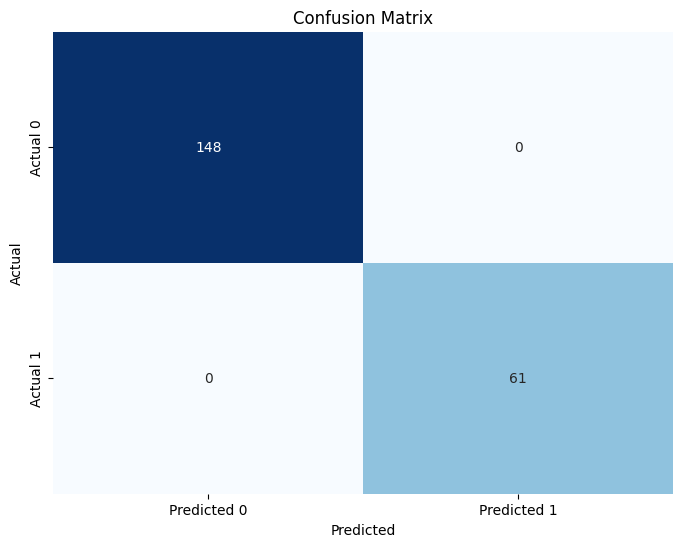

In [51]:
# Darstellung der Confusion Matrix
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Modellbildung mit Random Forrest: 

Hier wurden alle Daten die NaN sind durch 0 ersetzt weil weil das Modell nicht mit NaN werten arbeiten kann

In [52]:
# Initialisierung des Modells
model = RandomForestClassifier()

# Anpassung des Modells an die Trainingsdaten
model.fit(X2_train, y2_train)

# Vorhersagen auf den Testdaten
y2_pred = model.predict(X2_test)

In [53]:
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y2_test, y2_pred)

# Recall
recall = recall_score(y2_test, y2_pred)

# F1-Score
f1 = f1_score(y2_test, y2_pred)

# AUC-ROC Score
roc_auc = roc_auc_score(y2_test, y2_pred)

# Zeige die Ergebnisse an
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC Score: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC Score: 1.0


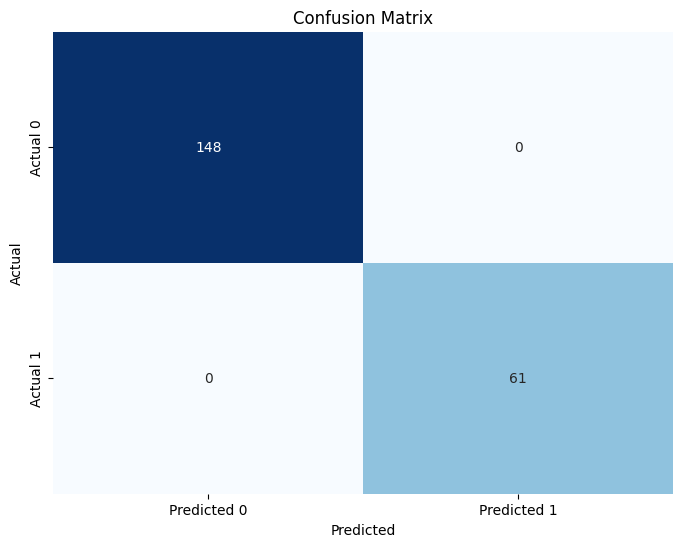

In [54]:
# Darstellung der Confusion Matrix
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Leider accuracy bei 1.0 gradient boost -> probieren:

Validierungsmethoden:

    Verwende korrekte Validierungsmethoden wie Kreuzvalidierung, um sicherzustellen, dass die Modellbewertung robust ist.
    Achte darauf, dass du nicht überoptimiert hast (Overfitting auf Trainingsdaten).

Imbalanced Classes:

    Überprüfe, ob deine Klassen im Datensatz unausgewogen sind. Wenn es eine signifikante Klassenasymmetrie gibt, könnte die Accuracy allein täuschen.
    Betrachte alternative Metriken wie Precision, Recall, F1-Score oder AUC-ROC, um die Leistung genauer zu bewerten.

Feature Engineering:

    Überlege, ob die verwendeten Features die relevanten Informationen enthalten. Manchmal könnte das Modell Overfitting auf bestimmte Muster in den Daten erleiden.

Hyperparameter-Tuning:

    Überprüfe die Hyperparameter des Modells. Es besteht die Möglichkeit, dass das Modell zu komplex ist und Overfitting auf den Trainingsdaten auftritt. Experimentiere mit verschiedenen Hyperparameter-Einstellungen.

Gewichtung der Klassen:

    Einige Klassifikationsalgorithmen, einschließlich Random Forest in scikit-learn, ermöglichen es dir, Klassen unterschiedlich zu gewichten. Du kannst das class_weight-Argument verwenden, um die Gewichtung der Klassen anzupassen. Ein höheres Gewicht für die Minderheitsklasse kann dazu beitragen, das Modell auf die selteneren Ereignisse zu fokussieren.

python

model = RandomForestClassifier(class_weight='balanced')

### Feature importance:

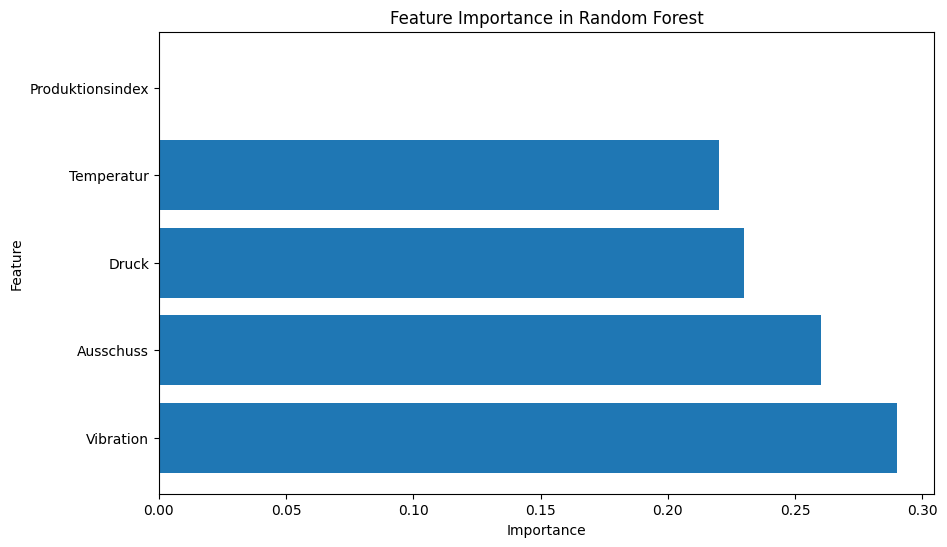

In [55]:
# Feature Importance extrahieren
feature_importance = model.feature_importances_

# Die Namen der Features (Variablen)
feature_names = X2.columns

# Feature Importance in ein DataFrame umwandeln
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sortiere das DataFrame nach Importance in absteigender Reihenfolge
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot der Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()